# The Linear Regression Model

We'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. Here are some of the columns: 

- `Lot Area`: Lot size in square feet.
- `Overall Qual`: Rates the overall material and finish of the house.
- `Overall Cond`: Rates the overall condition of the house.
- `Year Built`: Original construction date.
- `Low Qual Fin SF`: Low quality finished square feet (all floors).
- `Full Bath`: Full bathrooms above grade.
- `Fireplaces`: Number of fireplaces.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Exploring the Data

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")

In [3]:
data.shape

(2930, 82)

In [4]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [6]:
train = data[0:1460]
test = data[1460:]

target = 'SalePrice'

### Simple Linear Regression

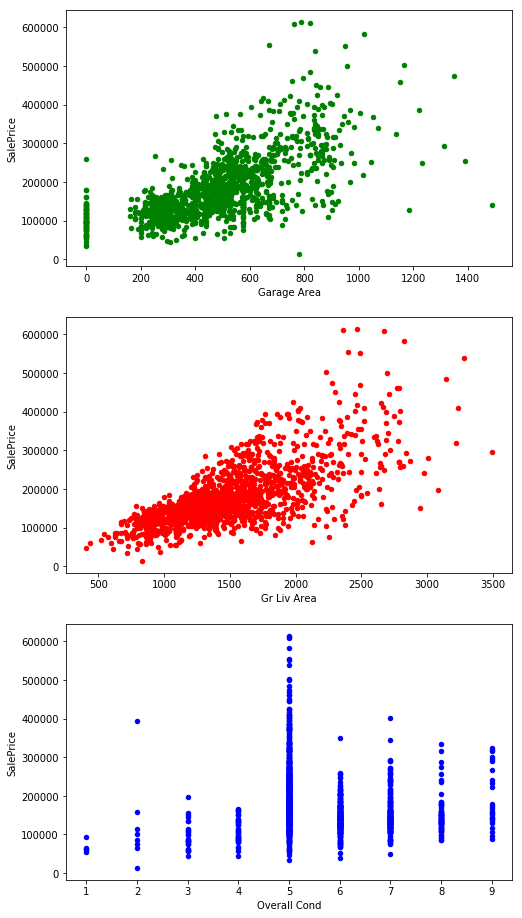

In [7]:
fig = plt.figure(figsize=(8,16))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x= "Garage Area", y= "SalePrice", ax=ax1, kind= "scatter", c = 'g')
train.plot(x= "Gr Liv Area", y= "SalePrice", ax=ax2, kind= "scatter", c = 'r')
train.plot(x= "Overall Cond", y= "SalePrice", ax=ax3, kind= "scatter", c = 'b')
plt.show()

In [8]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


SalePrice has the highest correlation with Gr Liv Area.

### Finding the optimal parameter values for the model

In [9]:
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.intercept_)
print(lr.coef_)

5366.821710056043
[116.86624683]


In [10]:
a0 = lr.intercept_
a1 = lr.coef_

### Predicting the labels

In [11]:
train_pred = lr.predict(train[['Gr Liv Area']])
test_pred = lr.predict(test[['Gr Liv Area']])

In [12]:
train_mse = mean_squared_error(train_pred, train['SalePrice'])
test_mse = mean_squared_error(test_pred, test['SalePrice'])

In [13]:
train_rmse = np.sqrt(train_mse)
print(train_rmse)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

56034.362001412796
57088.25161263909


### Multiple Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(train[['Overall Cond', 'Gr Liv Area']], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
train_pred = lr.predict(train[['Overall Cond', 'Gr Liv Area']])
test_pred = lr.predict(test[['Overall Cond', 'Gr Liv Area']])

In [16]:
train_rmse = np.sqrt(mean_squared_error(train_pred, train['SalePrice']))
print(train_rmse)
test_rmse = np.sqrt(mean_squared_error(test_pred, test['SalePrice']))
print(test_rmse)

56032.398015258674
57066.90779448559
